<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ETUDE DE MARCHE : LA POULE QUI CHANTE</h1>
</div>

In [1]:
#Importation des librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat as nbf
import openpyxl as opx
import numpy as np
import re
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import scipy.stats as stats

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - exploration des fichiers FAO</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - DisponibiliteAlimentaire_2017.csv</h3>


In [2]:
# Charger les fichiers avec le bon encodage 
df_alimentaire = pd.read_csv('data/DisponibiliteAlimentaire_2017.csv', encoding='utf-8')

In [3]:
# Afficher le nombre de valeurs manquantes par colonne
print(df_alimentaire.isnull().sum())

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64


In [4]:
# Filtrer les produits dont le nom contient "volaille"
volaille_codes = df_alimentaire[
    df_alimentaire['Produit'].str.lower().str.contains('volaille|poulet')
][['Code Produit', 'Produit']].drop_duplicates()

print(volaille_codes)


     Code Produit              Produit
651          2734  Viande de Volailles


In [5]:
CODE_PRODUIT_VOLAILLE = 2734  
df_volaille = df_alimentaire[df_alimentaire['Code Produit'] == CODE_PRODUIT_VOLAILLE]


In [6]:
# Nombre de pays uniques pour la volaille
nb_pays_volaille = df_volaille['Zone'].nunique()
print(f"Nombre de pays avec des données sur la volaille : {nb_pays_volaille}")


Nombre de pays avec des données sur la volaille : 172


In [7]:
# Quels types de données sont disponibles ?
print(df_volaille['Élément'].unique())


['Production' 'Importations - Quantité' 'Variation de stock'
 'Disponibilité intérieure' 'Pertes' 'Résidus' 'Nourriture'
 'Disponibilité alimentaire en quantité (kg/personne/an)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'
 'Exportations - Quantité' 'Alimentation pour touristes' 'Traitement'
 'Autres utilisations (non alimentaire)' 'Aliments pour animaux'
 'Semences']


In [8]:
# Filtrer les produits dont le nom contient "Production"
production_code = df_volaille[
    df_volaille['Élément'].str.lower().str.contains('production')
][['Code Élément', 'Élément']].drop_duplicates()
# Filtrer les produits dont le nom contient "exportation"
export_code  = df_volaille[
    df_volaille['Élément'].str.lower().str.contains('exportation')
][['Code Élément', 'Élément']].drop_duplicates()
# Filtrer les produits dont le nom contient "importation"
import_code  = df_volaille[
    df_volaille['Élément'].str.lower().str.contains('importation')
][['Code Élément', 'Élément']].drop_duplicates()
# Filtrer les produits dont le nom contient "Nourriture"
nourriture_code  = df_volaille[
    df_volaille['Élément'].str.lower().str.contains('nourriture')
][['Code Élément', 'Élément']].drop_duplicates()

print(production_code)
print(export_code)
print(import_code)
print(nourriture_code)


     Code Élément     Élément
651          5511  Production
      Code Élément                  Élément
1707          5911  Exportations - Quantité
     Code Élément                  Élément
652          5611  Importations - Quantité
     Code Élément     Élément
657          5142  Nourriture


In [9]:
# Récupérer les codes uniques pour chaque catégorie
codes_production = production_code['Code Élément'].unique()
codes_exportation = export_code['Code Élément'].unique()
codes_importation = import_code['Code Élément'].unique()
codes_importation = import_code['Code Élément'].unique()
codes_nourriture = nourriture_code['Code Élément'].unique()

# Combiner tous les codes dans une seule liste
codes_a_conserver = list(codes_production) + list(codes_exportation) + list(codes_importation) + list(codes_nourriture)

# Filtrer df_volaille pour ne garder que les lignes dont le 'Code Élément' est dans la liste
df_volaille_filtre = df_volaille[df_volaille['Code Élément'].isin(codes_a_conserver)]

df_volaille_filtre

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
657,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,55.0,S,Données standardisées
1704,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1667.0,S,Données standardisées
1705,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,514.0,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175364,FBS,Nouveaux Bilans Alimentaire,251,Zambie,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1.0,S,Données standardisées
175369,FBS,Nouveaux Bilans Alimentaire,251,Zambie,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,58.0,S,Données standardisées
176388,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,69.0,S,Données standardisées
176389,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,6.0,S,Données standardisées


In [10]:
# Nombre de pays uniques pour la volaille
nb_pays_volaille2 = df_volaille_filtre['Zone'].nunique()
print(f"Nombre de pays avec des données sur la volaille + production/importation/exportation/nourriture : {nb_pays_volaille2}")

Nombre de pays avec des données sur la volaille + production/importation/exportation/nourriture : 170


In [11]:
# Ajouter une colonne "Valeur (t)" = Valeur * 1000
df_volaille_filtre['Valeur (t)'] = df_volaille_filtre['Valeur'] * 1000


C:\Users\1340MAD\AppData\Local\Temp\ipykernel_18712\2888373265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volaille_filtre['Valeur (t)'] = df_volaille_filtre['Valeur'] * 1000


In [12]:
df_volaille_filtre

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Valeur (t)
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées,28000.0
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées,29000.0
657,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,55.0,S,Données standardisées,55000.0
1704,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1667.0,S,Données standardisées,1667000.0
1705,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,514.0,S,Données standardisées,514000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175364,FBS,Nouveaux Bilans Alimentaire,251,Zambie,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1.0,S,Données standardisées,1000.0
175369,FBS,Nouveaux Bilans Alimentaire,251,Zambie,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,58.0,S,Données standardisées,58000.0
176388,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,69.0,S,Données standardisées,69000.0
176389,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,6.0,S,Données standardisées,6000.0


In [13]:
# Résumé statistique pour la colonne 'Valeur'
print(df_volaille_filtre['Valeur'].describe())


count      643.000000
mean       414.611198
std       1726.021721
min          0.000000
25%          4.000000
50%         37.000000
75%        165.000000
max      21914.000000
Name: Valeur, dtype: float64


In [14]:
# Sélectionner uniquement les colonnes 'Zone', 'Élément', 'Produit', 'Année', 'Valeur (t)'
df_volaille_filtre = df_volaille_filtre[['Zone', 'Élément', 'Produit', 'Année', 'Valeur (t)']]

df_volaille_filtre

,Zone,Élément,Produit,Année,Valeur (t)
651,Afghanistan,Production,Viande de Volailles,2017,28000.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,29000.0
657,Afghanistan,Nourriture,Viande de Volailles,2017,55000.0
1704,Afrique du Sud,Production,Viande de Volailles,2017,1667000.0
1705,Afrique du Sud,Importations - Quantité,Viande de Volailles,2017,514000.0
...,...,...,...,...,...
175364,Zambie,Exportations - Quantité,Viande de Volailles,2017,1000.0
175369,Zambie,Nourriture,Viande de Volailles,2017,58000.0
176388,Zimbabwe,Production,Viande de Volailles,2017,69000.0
176389,Zimbabwe,Importations - Quantité,Viande de Volailles,2017,6000.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Population_2000_2018.csv</h3>

In [15]:
df_population = pd.read_csv('data/Population_2000_2018.csv', encoding='utf-8')

In [16]:
# Afficher le nombre de valeurs manquantes par colonne
print(df_population.isnull().sum())


Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64


In [17]:
# Garder seulement la population totale pour 2017 (pour correspondre à l'année du fichier alimentaire)
df_pop_2017 = df_population[
    (df_population['Année'] == 2017) 
]
df_pop_2017

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,OA,Séries temporelles annuelles,236,Venezuela (République bolivarienne du),511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,29402.484,X,Sources internationales sûres,NaN
4352,OA,Séries temporelles annuelles,237,Viet Nam,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,94600.648,X,Sources internationales sûres,NaN
4371,OA,Séries temporelles annuelles,249,Yémen,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,27834.819,X,Sources internationales sûres,NaN
4390,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,16853.599,X,Sources internationales sûres,NaN


In [18]:
print(df_pop_2017.describe())


        Code zone  Code Élément  Code Produit  Code année   Année  \
count  236.000000         236.0         236.0       236.0   236.0   
mean   134.894068         511.0        3010.0      2017.0  2017.0   
std     78.046150           0.0           0.0         0.0     0.0   
min      1.000000         511.0        3010.0      2017.0  2017.0   
25%     68.750000         511.0        3010.0      2017.0  2017.0   
50%    133.500000         511.0        3010.0      2017.0  2017.0   
75%    198.250000         511.0        3010.0      2017.0  2017.0   
max    299.000000         511.0        3010.0      2017.0  2017.0   

             Valeur  
count  2.360000e+02  
mean   3.198362e+04  
std    1.318949e+05  
min    7.930000e-01  
25%    3.803032e+02  
50%    5.203511e+03  
75%    1.930842e+04  
max    1.421022e+06  


In [19]:
# Ajouter une colonne "Population" = Valeur * 1000
df_pop_2017['Population'] = df_pop_2017['Valeur'] * 1000




C:\Users\1340MAD\AppData\Local\Temp\ipykernel_18712\2271656002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_2017['Population'] = df_pop_2017['Valeur'] * 1000


In [367]:
df_pop_2017

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note,Population
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN,36296113.0
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN,57009756.0
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN,2884169.0
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN,41389189.0
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN,82658409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,OA,Séries temporelles annuelles,236,Venezuela (République bolivarienne du),511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,29402.484,X,Sources internationales sûres,NaN,29402484.0
4352,OA,Séries temporelles annuelles,237,Viet Nam,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,94600.648,X,Sources internationales sûres,NaN,94600648.0
4371,OA,Séries temporelles annuelles,249,Yémen,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,27834.819,X,Sources internationales sûres,NaN,27834819.0
4390,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,16853.599,X,Sources internationales sûres,NaN,16853599.0


In [20]:
# Sélectionner uniquement les colonnes 'Zone' et 'Population'
df_pop_2017 = df_pop_2017[['Zone', 'Année', 'Population']]

df_pop_2017.reset_index(drop=True, inplace=True)


df_pop_2017

,Zone,Année,Population
0,Afghanistan,2017,36296113.0
1,Afrique du Sud,2017,57009756.0
2,Albanie,2017,2884169.0
3,Algérie,2017,41389189.0
4,Allemagne,2017,82658409.0
...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484.0
232,Viet Nam,2017,94600648.0
233,Yémen,2017,27834819.0
234,Zambie,2017,16853599.0


In [21]:
# Jointure à gauche sur 'Zone' et 'Année'
df_FAO = pd.merge(
    df_volaille_filtre,
    df_pop_2017,
    on=['Zone', 'Année'],
    how='left'
)

df_FAO



,Zone,Élément,Produit,Année,Valeur (t),Population
0,Afghanistan,Production,Viande de Volailles,2017,28000.0,36296113.0
1,Afghanistan,Importations - Quantité,Viande de Volailles,2017,29000.0,36296113.0
2,Afghanistan,Nourriture,Viande de Volailles,2017,55000.0,36296113.0
3,Afrique du Sud,Production,Viande de Volailles,2017,1667000.0,57009756.0
4,Afrique du Sud,Importations - Quantité,Viande de Volailles,2017,514000.0,57009756.0
...,...,...,...,...,...,...
638,Zambie,Exportations - Quantité,Viande de Volailles,2017,1000.0,16853599.0
639,Zambie,Nourriture,Viande de Volailles,2017,58000.0,16853599.0
640,Zimbabwe,Production,Viande de Volailles,2017,69000.0,14236595.0
641,Zimbabwe,Importations - Quantité,Viande de Volailles,2017,6000.0,14236595.0


In [ ]:
# Dépivoter la colonne 'Élément' en colonnes distinctes
df_pivot_fao = df_FAO.pivot(
    index=['Zone', 'Année', 'Population'],  # Colonnes à conserver comme index
    columns='Élément',                     # Colonne à dépivoter
    values='Valeur (t)'                     # Valeurs à répartir
).reset_index()  # Réinitialiser l'index pour obtenir un DataFrame plat

# Renommer les colonnes pour plus de clarté
df_pivot_fao.columns.name = None  # Supprimer le nom des colonnes 
df_pivot_fao = df_pivot_fao.rename(columns={
    'Production': 'Production (t)',
    'Importations - Quantité': 'Importations (t)',
    'Exportations - Quantité': 'Exportations (t)',
    'Nourriture': 'Nourriture (t)'
})

df_pivot_fao


,Zone,Année,Population,Exportations (t),Importations (t),Nourriture (t),Production (t)
0,Afghanistan,2017,36296113.0,NaN,29000.0,55000.0,28000.0
1,Afrique du Sud,2017,57009756.0,63000.0,514000.0,2035000.0,1667000.0
2,Albanie,2017,2884169.0,0.0,38000.0,47000.0,13000.0
3,Algérie,2017,41389189.0,0.0,2000.0,264000.0,275000.0
4,Allemagne,2017,82658409.0,646000.0,842000.0,1609000.0,1514000.0
...,...,...,...,...,...,...,...
165,Émirats arabes unis,2017,9487203.0,94000.0,433000.0,412000.0,48000.0
166,Équateur,2017,16785361.0,0.0,0.0,324000.0,340000.0
167,États-Unis d'Amérique,2017,325084756.0,3692000.0,123000.0,18100000.0,21914000.0
168,Éthiopie,2017,106399924.0,NaN,1000.0,14000.0,14000.0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Exploration et ajout de fichiers sources</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Code Pays</h3>

In [23]:
df_countrycode = pd.read_csv('data/country_code.csv', header=None, encoding='utf-8')

In [24]:
df_countrycode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       241 non-null    int64 
 1   1       241 non-null    int64 
 2   2       240 non-null    object
 3   3       241 non-null    object
 4   4       241 non-null    object
 5   5       241 non-null    object
dtypes: int64(2), object(4)
memory usage: 11.4+ KB


In [25]:
df_countrycode = df_countrycode.iloc[:, [3, 4]]

df_countrycode.columns = ["Country Code", "Zone"]

df_countrycode

,Country Code,Zone
0,AFG,Afghanistan
1,ALB,Albanie
2,ATA,Antarctique
3,DZA,Algérie
4,ASM,Samoa Américaines
...,...,...
236,WLF,Wallis et Futuna
237,WSM,Samoa
238,YEM,Yémen
239,SCG,Serbie-et-Monténégro


In [26]:
# Jointure à gauche sur 'Zone'
df_FAO = pd.merge(
    df_pivot_fao,
    df_countrycode,
    on=['Zone'],
    how='left'
)

df_FAO

,Zone,Année,Population,Exportations (t),Importations (t),Nourriture (t),Production (t),Country Code
0,Afghanistan,2017,36296113.0,NaN,29000.0,55000.0,28000.0,AFG
1,Afrique du Sud,2017,57009756.0,63000.0,514000.0,2035000.0,1667000.0,ZAF
2,Albanie,2017,2884169.0,0.0,38000.0,47000.0,13000.0,ALB
3,Algérie,2017,41389189.0,0.0,2000.0,264000.0,275000.0,DZA
4,Allemagne,2017,82658409.0,646000.0,842000.0,1609000.0,1514000.0,DEU
...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,2017,9487203.0,94000.0,433000.0,412000.0,48000.0,NaN
166,Équateur,2017,16785361.0,0.0,0.0,324000.0,340000.0,ECU
167,États-Unis d'Amérique,2017,325084756.0,3692000.0,123000.0,18100000.0,21914000.0,NaN
168,Éthiopie,2017,106399924.0,NaN,1000.0,14000.0,14000.0,ETH


In [27]:
# Filtrer les lignes où 'Country Code' est vide ou NaN
pays_sans_code = df_FAO[df_FAO['Country Code'].isna()]

# Afficher les pays sans 'Country Code'
print(pays_sans_code[['Zone', 'Country Code']])

# Compter le nombre de pays sans 'Country Code'
nombre_pays_sans_code = len(pays_sans_code)
print(f"Nombre de pays sans 'Country Code' : {nombre_pays_sans_code}")

                                                  Zone Country Code
7                                      Arabie saoudite          NaN
18                     Bolivie (État plurinational de)          NaN
26                                          Cabo Verde          NaN
31                            Chine - RAS de Hong-Kong          NaN
32                                Chine - RAS de Macao          NaN
33                           Chine, Taiwan Province de          NaN
34                                 Chine, continentale          NaN
37                                               Congo          NaN
48                                            Eswatini          NaN
68                      Iran (République islamique d')          NaN
88                                   Macédoine du Nord          NaN
100                                         Monténégro          NaN
119                                Polynésie française          NaN
123  Royaume-Uni de Grande-Bretagne et d'Irlande

In [28]:
# Dictionnaire de correspondance
codes_iso = {
    "Arabie saoudite": "SAU",
    "Bolivie (État plurinational de)": "BOL",
    "Cabo Verde": "CPV",
    "Chine - RAS de Hong-Kong": "HKG",
    "Chine - RAS de Macao": "MAC",
    "Chine, Taiwan Province de": "TWN",
    "Chine, continentale": "CHN",
    "Congo": "COG",
    "Eswatini": "SWZ",
    "Iran (République islamique d')": "IRN",
    "Macédoine du Nord": "MKD",
    "Monténégro": "MNE",
    "Polynésie française": "PYF",
    "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord": "GBR",
    "République centrafricaine": "CAF",
    "République dominicaine": "DOM",
    "République populaire démocratique de Corée": "PRK",
    "Serbie": "SRB",
    "Tchéquie": "CZE",
    "Émirats arabes unis": "ARE",
    "États-Unis d'Amérique": "USA"
}

# Mettre à jour les codes manquants
for zone, code in codes_iso.items():
    df_FAO.loc[df_FAO['Zone'] == zone, 'Country Code'] = code

# Vérifier les résultats
print("\nPays après mise à jour des 'Country Code' :")
print(df_FAO[df_FAO['Zone'].isin(codes_iso.keys())][['Zone', 'Country Code']])



Pays après mise à jour des 'Country Code' :
                                                  Zone Country Code
7                                      Arabie saoudite          SAU
18                     Bolivie (État plurinational de)          BOL
26                                          Cabo Verde          CPV
31                            Chine - RAS de Hong-Kong          HKG
32                                Chine - RAS de Macao          MAC
33                           Chine, Taiwan Province de          TWN
34                                 Chine, continentale          CHN
37                                               Congo          COG
48                                            Eswatini          SWZ
68                      Iran (République islamique d')          IRN
88                                   Macédoine du Nord          MKD
100                                         Monténégro          MNE
119                                Polynésie française          PYF
123

In [29]:
df_FAO

,Zone,Année,Population,Exportations (t),Importations (t),Nourriture (t),Production (t),Country Code
0,Afghanistan,2017,36296113.0,NaN,29000.0,55000.0,28000.0,AFG
1,Afrique du Sud,2017,57009756.0,63000.0,514000.0,2035000.0,1667000.0,ZAF
2,Albanie,2017,2884169.0,0.0,38000.0,47000.0,13000.0,ALB
3,Algérie,2017,41389189.0,0.0,2000.0,264000.0,275000.0,DZA
4,Allemagne,2017,82658409.0,646000.0,842000.0,1609000.0,1514000.0,DEU
...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,2017,9487203.0,94000.0,433000.0,412000.0,48000.0,ARE
166,Équateur,2017,16785361.0,0.0,0.0,324000.0,340000.0,ECU
167,États-Unis d'Amérique,2017,325084756.0,3692000.0,123000.0,18100000.0,21914000.0,USA
168,Éthiopie,2017,106399924.0,NaN,1000.0,14000.0,14000.0,ETH


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Stabilité politique</h3>

In [30]:
df_stability = pd.read_csv(
    "data/stability.csv",
    skiprows=4
)

In [31]:
df_stability.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [32]:
#Conserver les deux seules colonnes Country Code et 2107
df_stability = df_stability[["Country Code", "2017"]]

# Renommer la colonne "2017" en "Stabilité politique"
df_stability = df_stability.rename(columns={"2017": "Stabilité politique"})

df_stability

,Country Code,Stabilité politique
0,ABW,1.313846
1,AFE,NaN
2,AFG,-2.794976
3,AFW,NaN
4,AGO,-0.387895
...,...,...
261,XKX,-0.244493
262,YEM,-2.934317
263,ZAF,-0.284804
264,ZMB,0.142043


In [33]:
# Jointure à gauche sur 'country code'
df_pestel = pd.merge(
    df_FAO,
    df_stability,
    on=['Country Code'],
    how='left'
)
df_pestel

,Zone,Année,Population,Exportations (t),Importations (t),Nourriture (t),Production (t),Country Code,Stabilité politique
0,Afghanistan,2017,36296113.0,NaN,29000.0,55000.0,28000.0,AFG,-2.794976
1,Afrique du Sud,2017,57009756.0,63000.0,514000.0,2035000.0,1667000.0,ZAF,-0.284804
2,Albanie,2017,2884169.0,0.0,38000.0,47000.0,13000.0,ALB,0.373771
3,Algérie,2017,41389189.0,0.0,2000.0,264000.0,275000.0,DZA,-0.919614
4,Allemagne,2017,82658409.0,646000.0,842000.0,1609000.0,1514000.0,DEU,0.574381
...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,2017,9487203.0,94000.0,433000.0,412000.0,48000.0,ARE,0.601950
166,Équateur,2017,16785361.0,0.0,0.0,324000.0,340000.0,ECU,-0.078932
167,États-Unis d'Amérique,2017,325084756.0,3692000.0,123000.0,18100000.0,21914000.0,USA,0.262138
168,Éthiopie,2017,106399924.0,NaN,1000.0,14000.0,14000.0,ETH,-1.677231


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - PIB</h3>

In [34]:
df_pib = pd.read_csv(
    "data/pib.csv",
    skiprows=4
)

In [35]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            151 non-null    float64
 5   1961            154 non-null    float64
 6   1962            156 non-null    float64
 7   1963            156 non-null    float64
 8   1964            156 non-null    float64
 9   1965            162 non-null    float64
 10  1966            163 non-null    float64
 11  1967            167 non-null    float64
 12  1968            168 non-null    float64
 13  1969            168 non-null    float64
 14  1970            190 non-null    float64
 15  1971            191 non-null    float64
 16  1972            191 non-null    float64
 17  1973            191 non-null    flo

In [36]:
#Conserver les deux seules colonnes Country Code et 2017
df_pib = df_pib[["Country Code", "2017"]]

# Renommer la colonne "2017" en "Stabilité politique"
df_pib = df_pib.rename(columns={"2017": "PIB"})

df_pib

,Country Code,PIB
0,ABW,28440.051964
1,AFE,1520.212231
2,AFG,525.469771
3,AFW,1574.230560
4,AGO,2437.259712
...,...,...
261,XKX,4009.317993
262,YEM,811.165970
263,ZAF,6618.335083
264,ZMB,1483.465773


In [37]:
# Jointure à gauche sur 'country code'
df_pestel = pd.merge(
    df_pestel,
    df_pib,
    on=['Country Code'],
    how='left'
)
df_pestel

,Zone,Année,Population,Exportations (t),Importations (t),Nourriture (t),Production (t),Country Code,Stabilité politique,PIB
0,Afghanistan,2017,36296113.0,NaN,29000.0,55000.0,28000.0,AFG,-2.794976,525.469771
1,Afrique du Sud,2017,57009756.0,63000.0,514000.0,2035000.0,1667000.0,ZAF,-0.284804,6618.335083
2,Albanie,2017,2884169.0,0.0,38000.0,47000.0,13000.0,ALB,0.373771,4614.047969
3,Algérie,2017,41389189.0,0.0,2000.0,264000.0,275000.0,DZA,-0.919614,4554.667540
4,Allemagne,2017,82658409.0,646000.0,842000.0,1609000.0,1514000.0,DEU,0.574381,45526.599958
...,...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,2017,9487203.0,94000.0,433000.0,412000.0,48000.0,ARE,0.601950,42340.591716
166,Équateur,2017,16785361.0,0.0,0.0,324000.0,340000.0,ECU,-0.078932,6233.322448
167,États-Unis d'Amérique,2017,325084756.0,3692000.0,123000.0,18100000.0,21914000.0,USA,0.262138,60047.719073
168,Éthiopie,2017,106399924.0,NaN,1000.0,14000.0,14000.0,ETH,-1.677231,745.632434


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Infrastructures et logistique</h3>

In [38]:
df_infra = pd.read_csv(
    "data/infrastructures.csv",
    skiprows=4
)
df_infra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [39]:
#Conserver les deux seules colonnes Country Code et 2017
df_infra = df_infra[["Country Code", "2016"]]

# Renommer la colonne "2017" en "Stabilité politique"
df_infra = df_infra.rename(columns={"2016": "Infrastructures"})

df_infra

,Country Code,Infrastructures
0,ABW,NaN
1,AFE,2.392239
2,AFG,1.835473
3,AFW,2.177056
4,AGO,2.133789
...,...,...
261,XKX,NaN
262,YEM,NaN
263,ZAF,3.776261
264,ZMB,2.262771


In [40]:
# Jointure à gauche sur 'country code'
df_pestel = pd.merge(
    df_pestel,
    df_infra,
    on=['Country Code'],
    how='left'
)
df_pestel

,Zone,Année,Population,Exportations (t),Importations (t),Nourriture (t),Production (t),Country Code,Stabilité politique,PIB,Infrastructures
0,Afghanistan,2017,36296113.0,NaN,29000.0,55000.0,28000.0,AFG,-2.794976,525.469771,1.835473
1,Afrique du Sud,2017,57009756.0,63000.0,514000.0,2035000.0,1667000.0,ZAF,-0.284804,6618.335083,3.776261
2,Albanie,2017,2884169.0,0.0,38000.0,47000.0,13000.0,ALB,0.373771,4614.047969,1.980952
3,Algérie,2017,41389189.0,0.0,2000.0,264000.0,275000.0,DZA,-0.919614,4554.667540,2.577318
4,Allemagne,2017,82658409.0,646000.0,842000.0,1609000.0,1514000.0,DEU,0.574381,45526.599958,4.439356
...,...,...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,2017,9487203.0,94000.0,433000.0,412000.0,48000.0,ARE,0.601950,42340.591716,4.069324
166,Équateur,2017,16785361.0,0.0,0.0,324000.0,340000.0,ECU,-0.078932,6233.322448,2.469210
167,États-Unis d'Amérique,2017,325084756.0,3692000.0,123000.0,18100000.0,21914000.0,USA,0.262138,60047.719073,4.152011
168,Éthiopie,2017,106399924.0,NaN,1000.0,14000.0,14000.0,ETH,-1.677231,745.632434,2.117674


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.5 - Tarifs douaniers</h3>

In [41]:
df_douanes = pd.read_csv(
    "data/douanes.csv",
    skiprows=4
)
df_douanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [42]:
#Conserver les deux seules colonnes Country Code et 2107
df_douanes = df_douanes[["Country Code", "2017"]]

# Renommer la colonne "2017" en "Stabilité politique"
df_douanes = df_douanes.rename(columns={"2017": "Douanes (%)"})

df_douanes

,Country Code,Douanes (%)
0,ABW,9.99
1,AFE,NaN
2,AFG,NaN
3,AFW,NaN
4,AGO,NaN
...,...,...
261,XKX,NaN
262,YEM,5.76
263,ZAF,6.67
264,ZMB,NaN


In [43]:
# Jointure à gauche sur 'country code'
df_pestel = pd.merge(
    df_pestel,
    df_douanes,
    on=['Country Code'],
    how='left'
)
df_pestel

,Zone,Année,Population,Exportations (t),Importations (t),Nourriture (t),Production (t),Country Code,Stabilité politique,PIB,Infrastructures,Douanes (%)
0,Afghanistan,2017,36296113.0,NaN,29000.0,55000.0,28000.0,AFG,-2.794976,525.469771,1.835473,NaN
1,Afrique du Sud,2017,57009756.0,63000.0,514000.0,2035000.0,1667000.0,ZAF,-0.284804,6618.335083,3.776261,6.67
2,Albanie,2017,2884169.0,0.0,38000.0,47000.0,13000.0,ALB,0.373771,4614.047969,1.980952,1.22
3,Algérie,2017,41389189.0,0.0,2000.0,264000.0,275000.0,DZA,-0.919614,4554.667540,2.577318,12.32
4,Allemagne,2017,82658409.0,646000.0,842000.0,1609000.0,1514000.0,DEU,0.574381,45526.599958,4.439356,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,2017,9487203.0,94000.0,433000.0,412000.0,48000.0,ARE,0.601950,42340.591716,4.069324,4.56
166,Équateur,2017,16785361.0,0.0,0.0,324000.0,340000.0,ECU,-0.078932,6233.322448,2.469210,9.42
167,États-Unis d'Amérique,2017,325084756.0,3692000.0,123000.0,18100000.0,21914000.0,USA,0.262138,60047.719073,4.152011,3.36
168,Éthiopie,2017,106399924.0,NaN,1000.0,14000.0,14000.0,ETH,-1.677231,745.632434,2.117674,NaN


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.6 - Distance</h3>

In [45]:
%pip install xlrd

  Using cached xlrd-2.0.2-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached xlrd-2.0.2-py2.py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


In [46]:
# Charger les fichiers avec le bon encodage 
df_distance = pd.read_excel("data/distance.xls", engine="xlrd")

In [47]:
df_distance.info()

df_distance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50176 entries, 0 to 50175
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   iso_o          50176 non-null  object 
 1   iso_d          50176 non-null  object 
 2   contig         50176 non-null  int64  
 3   comlang_off    50176 non-null  int64  
 4   comlang_ethno  50176 non-null  int64  
 5   colony         50176 non-null  int64  
 6   comcol         50176 non-null  int64  
 7   curcol         50176 non-null  int64  
 8   col45          50176 non-null  int64  
 9   smctry         50176 non-null  int64  
 10  dist           50176 non-null  float64
 11  distcap        50176 non-null  float64
 12  distw          50176 non-null  object 
 13  distwces       50176 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.4+ MB


,iso_o,iso_d,contig,comlang_off,comlang_ethno,colony,comcol,curcol,col45,smctry,dist,distcap,distw,distwces
0,ABW,ABW,0,0,0,0,0,0,0,0,5.225315,5.225315,25.09354,23.04723
1,ABW,AFG,0,0,0,0,0,0,0,0,13257.810000,13257.810000,13168.22,13166.37
2,ABW,AGO,0,0,0,0,0,0,0,0,9516.913000,9516.913000,9587.316,9584.193
3,ABW,AIA,0,0,1,0,0,0,0,0,983.268200,983.268200,976.8974,976.8916
4,ABW,ALB,0,0,0,0,0,0,0,0,9091.742000,9091.742000,9091.576,9091.466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50171,ZWE,YUG,0,0,0,0,0,0,0,0,7056.402000,7056.402000,7046.432,7042.83
50172,ZWE,ZAF,1,1,1,0,0,0,0,0,2186.206000,926.174300,1258.552,1101.438
50173,ZWE,ZAR,0,0,0,0,0,0,0,0,2283.061000,2283.061000,1930.976,1719.147
50174,ZWE,ZMB,1,1,1,0,1,0,0,0,396.804100,396.804100,583.7954,525.0734


In [48]:
# Filtrer les lignes où iso_o = "FRA"
df_distance = df_distance[df_distance['iso_o'] == 'FRA']

# Sélectionner uniquement les colonnes 'iso_d' et 'distance'
df_distance = df_distance[['iso_d', 'dist']]

In [49]:
# Renommer la colonne 'iso_d' en 'Country Code'
df_distance = df_distance.rename(columns={'iso_d': 'Country Code'})

In [50]:
# Afficher les premières lignes
print(df_distance.head())


      Country Code      dist
15008          ABW  7685.884
15009          AFG  5590.381
15010          AGO  6510.322
15011          AIA  6710.570
15012          ALB  1603.534


In [51]:
# Jointure à gauche sur 'country code'
df_pestel = pd.merge(
    df_pestel,
    df_distance,
    on=['Country Code'],
    how='left'
)
df_pestel

,Zone,Année,Population,Exportations (t),Importations (t),Nourriture (t),Production (t),Country Code,Stabilité politique,PIB,Infrastructures,Douanes (%),dist
0,Afghanistan,2017,36296113.0,NaN,29000.0,55000.0,28000.0,AFG,-2.794976,525.469771,1.835473,NaN,5590.3810
1,Afrique du Sud,2017,57009756.0,63000.0,514000.0,2035000.0,1667000.0,ZAF,-0.284804,6618.335083,3.776261,6.67,9353.5520
2,Albanie,2017,2884169.0,0.0,38000.0,47000.0,13000.0,ALB,0.373771,4614.047969,1.980952,1.22,1603.5340
3,Algérie,2017,41389189.0,0.0,2000.0,264000.0,275000.0,DZA,-0.919614,4554.667540,2.577318,12.32,1340.3900
4,Allemagne,2017,82658409.0,646000.0,842000.0,1609000.0,1514000.0,DEU,0.574381,45526.599958,4.439356,2.48,439.8984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,2017,9487203.0,94000.0,433000.0,412000.0,48000.0,ARE,0.601950,42340.591716,4.069324,4.56,5249.5350
166,Équateur,2017,16785361.0,0.0,0.0,324000.0,340000.0,ECU,-0.078932,6233.322448,2.469210,9.42,9367.0980
167,États-Unis d'Amérique,2017,325084756.0,3692000.0,123000.0,18100000.0,21914000.0,USA,0.262138,60047.719073,4.152011,3.36,5838.1570
168,Éthiopie,2017,106399924.0,NaN,1000.0,14000.0,14000.0,ETH,-1.677231,745.632434,2.117674,NaN,5582.5020


In [52]:
# Filtrer les lignes où 'Country Code' est vide ou NaN
pays_sans_code = df_pestel[df_pestel['Country Code'].isna()]

# Afficher les pays sans 'Country Code'
print(pays_sans_code[['Zone', 'Country Code']])

# Compter le nombre de pays sans 'Country Code'
nombre_pays_sans_code = len(pays_sans_code)
print(f"Nombre de pays sans 'Country Code' : {nombre_pays_sans_code}")


                                       Zone Country Code
159  Venezuela (République bolivarienne du)          NaN
Nombre de pays sans 'Country Code' : 1


In [53]:
# Supprimer les lignes où 'Country Code' est vide
df_pestel = df_pestel.dropna(subset=['Country Code'])
df_pestel

,Zone,Année,Population,Exportations (t),Importations (t),Nourriture (t),Production (t),Country Code,Stabilité politique,PIB,Infrastructures,Douanes (%),dist
0,Afghanistan,2017,36296113.0,NaN,29000.0,55000.0,28000.0,AFG,-2.794976,525.469771,1.835473,NaN,5590.3810
1,Afrique du Sud,2017,57009756.0,63000.0,514000.0,2035000.0,1667000.0,ZAF,-0.284804,6618.335083,3.776261,6.67,9353.5520
2,Albanie,2017,2884169.0,0.0,38000.0,47000.0,13000.0,ALB,0.373771,4614.047969,1.980952,1.22,1603.5340
3,Algérie,2017,41389189.0,0.0,2000.0,264000.0,275000.0,DZA,-0.919614,4554.667540,2.577318,12.32,1340.3900
4,Allemagne,2017,82658409.0,646000.0,842000.0,1609000.0,1514000.0,DEU,0.574381,45526.599958,4.439356,2.48,439.8984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,2017,9487203.0,94000.0,433000.0,412000.0,48000.0,ARE,0.601950,42340.591716,4.069324,4.56,5249.5350
166,Équateur,2017,16785361.0,0.0,0.0,324000.0,340000.0,ECU,-0.078932,6233.322448,2.469210,9.42,9367.0980
167,États-Unis d'Amérique,2017,325084756.0,3692000.0,123000.0,18100000.0,21914000.0,USA,0.262138,60047.719073,4.152011,3.36,5838.1570
168,Éthiopie,2017,106399924.0,NaN,1000.0,14000.0,14000.0,ETH,-1.677231,745.632434,2.117674,NaN,5582.5020


In [504]:
# Réinitialiser l'index
df_pestel = df_pestel.reset_index(drop=True)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse univariée et bivariée</h2>
</div>

In [54]:
# Paramétrer l'affichage des graphiques
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

In [55]:
# Pourcentage de valeurs manquantes par colonne
pourcentage_manquant = (df_pestel.isna().mean() * 100).round(2)
print("\nPourcentage de valeurs manquantes par colonne :")
print(pourcentage_manquant)



Pourcentage de valeurs manquantes par colonne :
Zone                    0.00
Année                   0.00
Population              0.00
Exportations (t)       20.71
Importations (t)        0.00
Nourriture (t)          0.00
Production (t)          1.18
Country Code            0.00
Stabilité politique     1.78
PIB                     1.18
Infrastructures        15.98
Douanes (%)            32.54
dist                    2.37
dtype: float64


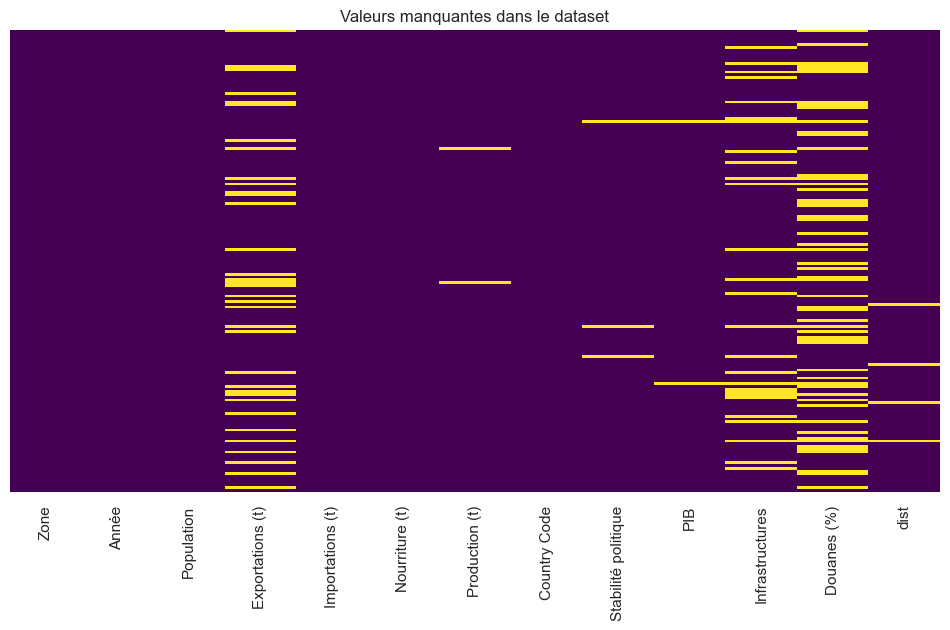

In [509]:
# Heatmap des valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(df_pestel.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Valeurs manquantes dans le dataset")
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.7 - Optimisation des données</h3>

In [56]:
# Afficher les lignes où 'Exportations (t)' est manquante
lignes_manquantes = df_pestel[df_pestel['Exportations (t)'].isna()]
print("\nLignes avec des valeurs manquantes pour 'Exportations (t)' :")
print(lignes_manquantes[['Zone', 'Exportations (t)']])



Lignes avec des valeurs manquantes pour 'Exportations (t)' :
                                Zone  Exportations (t)
0                        Afghanistan               NaN
13                           Bahamas               NaN
14                        Bangladesh               NaN
23                      Burkina Faso               NaN
26                        Cabo Verde               NaN
27                          Cambodge               NaN
40                              Cuba               NaN
43                          Djibouti               NaN
54                            Gambie               NaN
56                           Grenade               NaN
59                            Guinée               NaN
60                     Guinée-Bissau               NaN
63                             Haïti               NaN
80                          Kiribati               NaN
89                        Madagascar               NaN
91                            Malawi               NaN
92 

In [57]:
# Recalculer 'Exportations (t)' pour ces lignes
for index, row in lignes_manquantes.iterrows():
    exportations = row['Production (t)'] + row['Importations (t)'] - row['Nourriture (t)']
    df_pestel.at[index, 'Exportations (t)'] = exportations

# Vérifier les résultats
print("\nLignes après recalcul des 'Exportations (t)' manquantes :")
print(df_pestel[df_pestel['Zone'].isin(lignes_manquantes['Zone'])][['Zone', 'Exportations (t)']])




Lignes après recalcul des 'Exportations (t)' manquantes :
                                Zone  Exportations (t)
0                        Afghanistan            2000.0
13                           Bahamas           14000.0
14                        Bangladesh            9000.0
23                      Burkina Faso            2000.0
26                        Cabo Verde            4000.0
27                          Cambodge            1000.0
40                              Cuba           72000.0
43                          Djibouti               NaN
54                            Gambie           10000.0
56                           Grenade            3000.0
59                            Guinée            1000.0
60                     Guinée-Bissau            3000.0
63                             Haïti               0.0
80                          Kiribati               0.0
89                        Madagascar            8000.0
91                            Malawi           39000.0
92    

In [58]:
# Remplacer les valeurs null par 0 pour 'Djibouti' et 'Maldives' dans zone
df_pestel.loc[df_pestel['Zone'].isin(['Djibouti', 'Maldives']), :] = df_pestel.loc[df_pestel['Zone'].isin(['Djibouti', 'Maldives']), :].fillna(0)

# Remplacer les valeurs négatives par 0 dans 'Exportations (t)'
df_pestel['Exportations (t)'] = df_pestel['Exportations (t)'].apply(lambda x: max(0, x))


C:\Users\1340MAD\AppData\Local\Temp\ipykernel_18712\1563876298.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pestel['Exportations (t)'] = df_pestel['Exportations (t)'].apply(lambda x: max(0, x))


In [59]:
# Afficher les lignes où 'Douanes (%)' est manquante
lignes_manquantes = df_pestel[df_pestel['Douanes (%)'].isna()]
print("\nLignes avec des valeurs manquantes pour 'Douanes (%)' :")
print(lignes_manquantes[['Zone', 'Douanes (%)']])


Lignes avec des valeurs manquantes pour 'Douanes (%)' :
                                           Zone  Douanes (%)
0                                   Afghanistan          NaN
5                                        Angola          NaN
12                                  Azerbaïdjan          NaN
13                                      Bahamas          NaN
14                                   Bangladesh          NaN
15                                      Barbade          NaN
26                                   Cabo Verde          NaN
27                                     Cambodge          NaN
28                                     Cameroun          NaN
33                    Chine, Taiwan Province de          NaN
37                                        Congo          NaN
38                                   Costa Rica          NaN
53                                        Gabon          NaN
54                                       Gambie          NaN
56                          

In [60]:
# Afficher les lignes où 'Infrastructures' est manquante
lignes_manquantes = df_pestel[df_pestel['Infrastructures'].isna()]
print("\nLignes avec des valeurs manquantes pour 'Infrastructures' :")
print(lignes_manquantes[['Zone', 'Infrastructures']])


Lignes avec des valeurs manquantes pour 'Infrastructures' :
                                           Zone  Infrastructures
6                            Antigua-et-Barbuda              NaN
12                                  Azerbaïdjan              NaN
15                                      Barbade              NaN
17                                       Belize              NaN
26                                   Cabo Verde              NaN
32                         Chine - RAS de Macao              NaN
33                    Chine, Taiwan Province de              NaN
44                                    Dominique              NaN
48                                     Eswatini              NaN
54                                       Gambie              NaN
56                                      Grenade              NaN
80                                     Kiribati              NaN
91                                       Malawi              NaN
96                           

In [61]:
# Afficher les lignes où 'distance' est manquante
lignes_manquantes = df_pestel[df_pestel['dist'].isna()]
print("\nLignes avec des valeurs manquantes pour 'Country Code' :")
print(lignes_manquantes[['Country Code', 'dist']])


Lignes avec des valeurs manquantes pour 'Country Code' :
    Country Code  dist
100          MNE   NaN
122          ROU   NaN
136          SRB   NaN
150          TLS   NaN


In [62]:
#Remplacement des valeurs manquantes  directement dans le dataset
df_pestel.loc[df_pestel['Country Code'] == 'ROU', 'dist'] = 2000
df_pestel.loc[df_pestel['Country Code'] == 'TLS', 'dist'] = 12000
df_pestel.loc[df_pestel['Country Code'] == 'MNE', 'dist'] = 1600
df_pestel.loc[df_pestel['Country Code'] == 'SRB', 'dist'] = 1500


In [63]:
# Pourcentage de valeurs manquantes par colonne
pourcentage_manquant = (df_pestel.isna().mean() * 100).round(2)
print("\nPourcentage de valeurs manquantes par colonne :")
print(pourcentage_manquant)


Pourcentage de valeurs manquantes par colonne :
Zone                    0.00
Année                   0.00
Population              0.00
Exportations (t)        0.00
Importations (t)        0.00
Nourriture (t)          0.00
Production (t)          0.00
Country Code            0.00
Stabilité politique     1.78
PIB                     1.18
Infrastructures        15.98
Douanes (%)            31.95
dist                    0.00
dtype: float64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.8 - Exportation du fichier complet</h3>

In [64]:
#export du fichier au format csv
df_pestel.to_csv("data/donnees_completes.csv", index=False, encoding='utf-8')
# Charger le fichier
df_pestel = pd.read_csv("data/donnees_completes.csv")

In [65]:
# Afficher les 5 premières lignes
print("Premières lignes du dataset :")
print(df_pestel.head())

# Afficher les informations générales (colonnes, types, valeurs manquantes)
print("\nInformations sur le dataset :")
print(df_pestel.info())

# Afficher les statistiques descriptives
print("\nStatistiques descriptives :")
print(df_pestel.describe(include='all'))

Premières lignes du dataset :
             Zone  Année  Population  Exportations (t)  Importations (t)  \
0     Afghanistan   2017  36296113.0            2000.0           29000.0   
1  Afrique du Sud   2017  57009756.0           63000.0          514000.0   
2         Albanie   2017   2884169.0               0.0           38000.0   
3         Algérie   2017  41389189.0               0.0            2000.0   
4       Allemagne   2017  82658409.0          646000.0          842000.0   

   Nourriture (t)  Production (t) Country Code  Stabilité politique  \
0         55000.0         28000.0          AFG            -2.794976   
1       2035000.0       1667000.0          ZAF            -0.284804   
2         47000.0         13000.0          ALB             0.373771   
3        264000.0        275000.0          DZA            -0.919614   
4       1609000.0       1514000.0          DEU             0.574381   

            PIB  Infrastructures  Douanes (%)       dist  
0    525.469771         1.8

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Analyse Globale</h3>

In [66]:
# Supprimer la colonne 'Année'
df_pestel = df_pestel.drop(columns=['Année'])

# Sélectionner uniquement les colonnes numériques
df_numerique = df_pestel.select_dtypes(include=['float64', 'int64'])


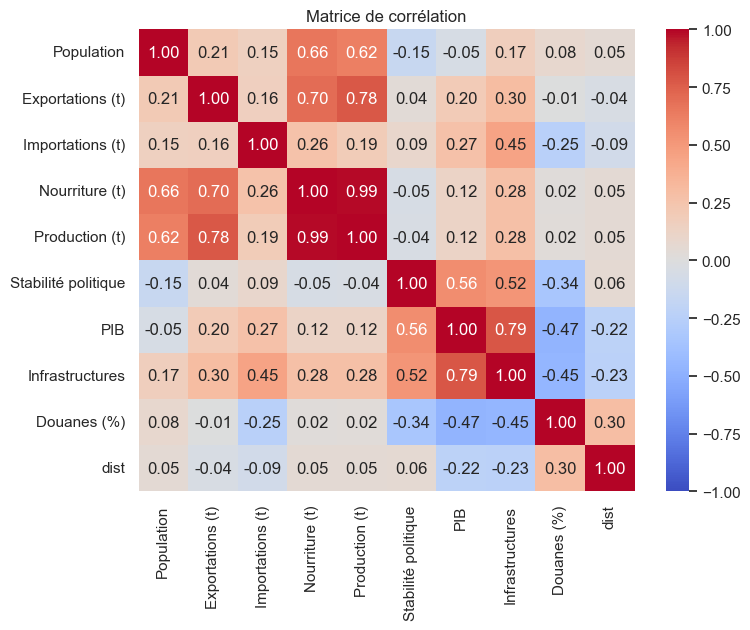

In [67]:
# Calculer la matrice de corrélation de Pearson
corr_matrix = df_numerique.corr()

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, center=0,  fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

<b><u>Analyse </u></b>
<div>
On distingue 3 "blocs" :</div>
<ul>Masse et logistique Alimentaire : 
<li>Production et nourriture (0.99) - la corrélation la plus élevée - La production est quasi-totalement destinée à l'alimentation</li>
<li>Production et Exportation (0.78) - la capacité à exporter est très fortement liée au volume de production</li>
<li>Population et nourriture (0.66) - plus la population est grande, plus les besoins alimentaires (nourriture) sont élevés</li></ul>
<ul>Développement économique : 
<li>PIB et Infrastructures (0.79) - C'est le lien le plus fort de ce groupe. Un PIB élevé est presque systématiquement associé à de meilleures infrastructures</li>
<li>Stabilité Politique et PIB (0.56) - Il existe une corrélation solide entre la santé économique et la stabilité des institutions.</li>
<li>Stabilité Politique et Infrastructures (0.52) - La stabilité favorise également le maintien ou le développement des infrastructures.</li></ul>
<ul>Les corrélations Négatives (l'effet barrière) :
<li>Douanes et PIB (-0.47) - Plus un pays est riche, plus ses tarifs douaniers ont tendance à être bas (politiques libérales).</li>
<li>Douanes et infrastructures (-0.25) - Les pays ayant les infrastructures les moins développées sont souvent ceux qui appliquent les taxes douanières les plus protectrices.</li>
<li>Douanes et Importations (-0.25) - Comme prévu, des taxes plus élevées ont un effet dissuasif modéré sur le volume des importations.<br>


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Analyse univariée</h3>

<b><u>Pair plot</u></b>

<b><u>Production et nourriture</u></b>

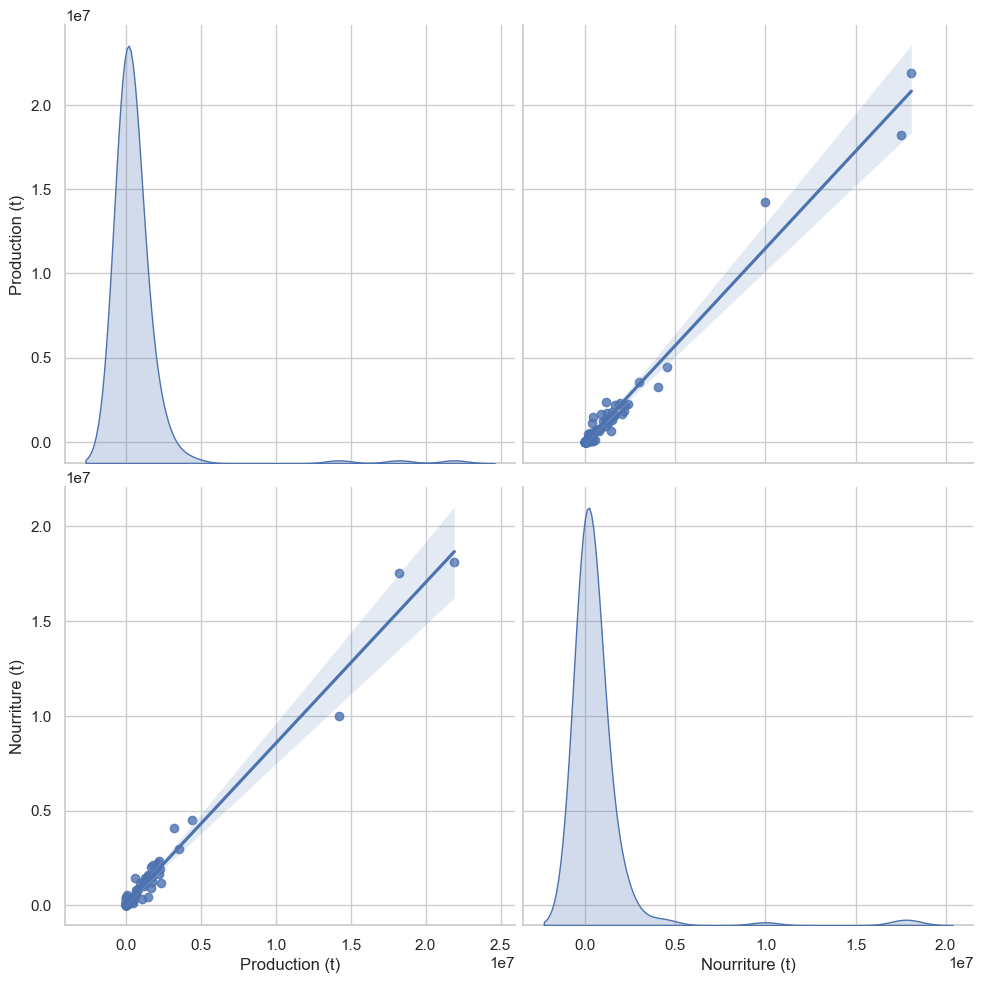

In [68]:
# Sélectionner les colonnes d'intérêt
colonnes = ['Production (t)', 'Nourriture (t)']

# Créer le pair plot avec régression linéaire et densité sur la diagonale
sns.pairplot(
    df_numerique[colonnes],
    kind='reg',  # Courbes de régression linéaire
    diag_kind='kde',  # Courbes de densité sur la diagonale
    height=5
)
plt.show()


Coorélation quasi parfaite. Il y a un lien entre production de volaille et consommation alimentaire. 3 outliers qui respectent la même logique : Une production massive entraine une consommation massive.

<b><u>Production et exportation</u></b>

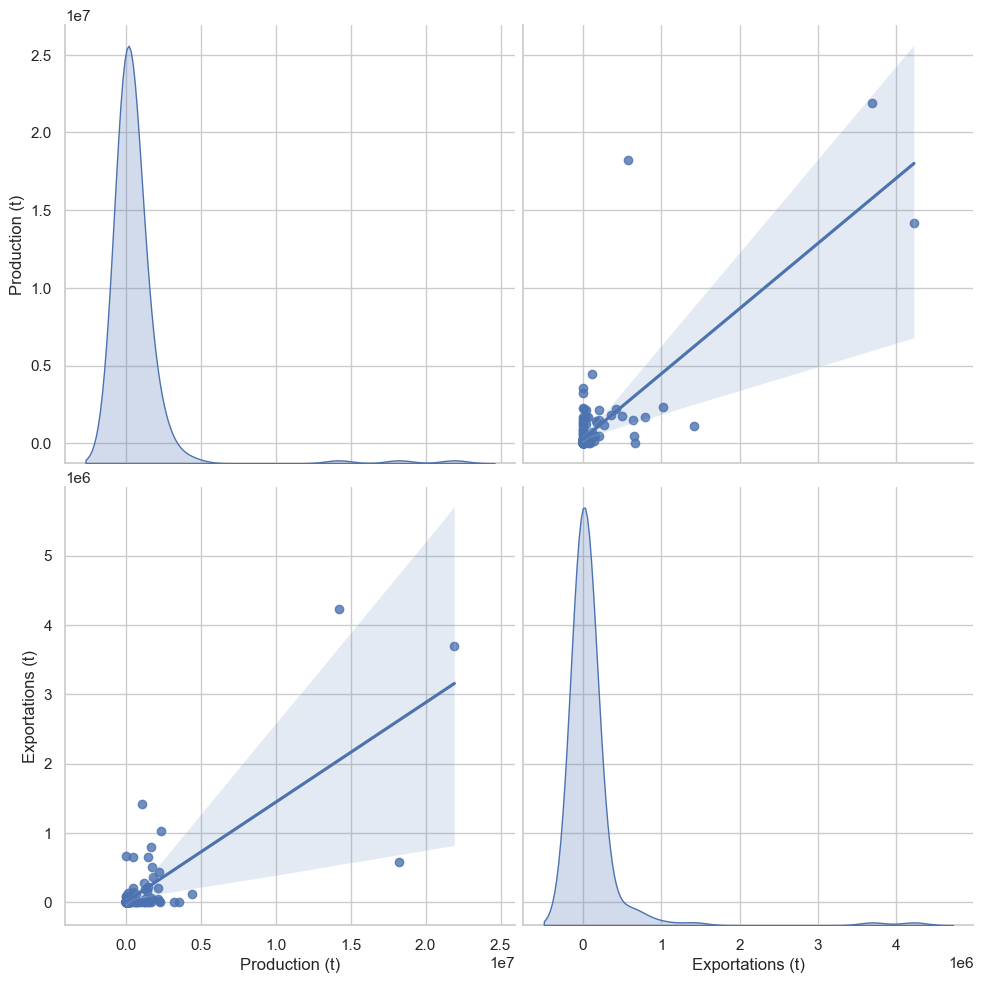

In [69]:
# Sélectionner les colonnes d'intérêt
colonnes = ['Production (t)', 'Exportations (t)']

# Créer le pair plot avec régression linéaire et densité sur la diagonale
sns.pairplot(
    df_numerique[colonnes],
    kind='reg',  # Courbes de régression linéaire
    diag_kind='kde',  # Courbes de densité sur la diagonale
    height=5
)
plt.show()

Plus la production d'un pays est élevée, plus sa capacité à exporter est grande. La production est le levier de l'exportation. Les plus gros producteurs sont nos plus gros concurrents.

<b><u>Population et Nourriture (t)</u></b>

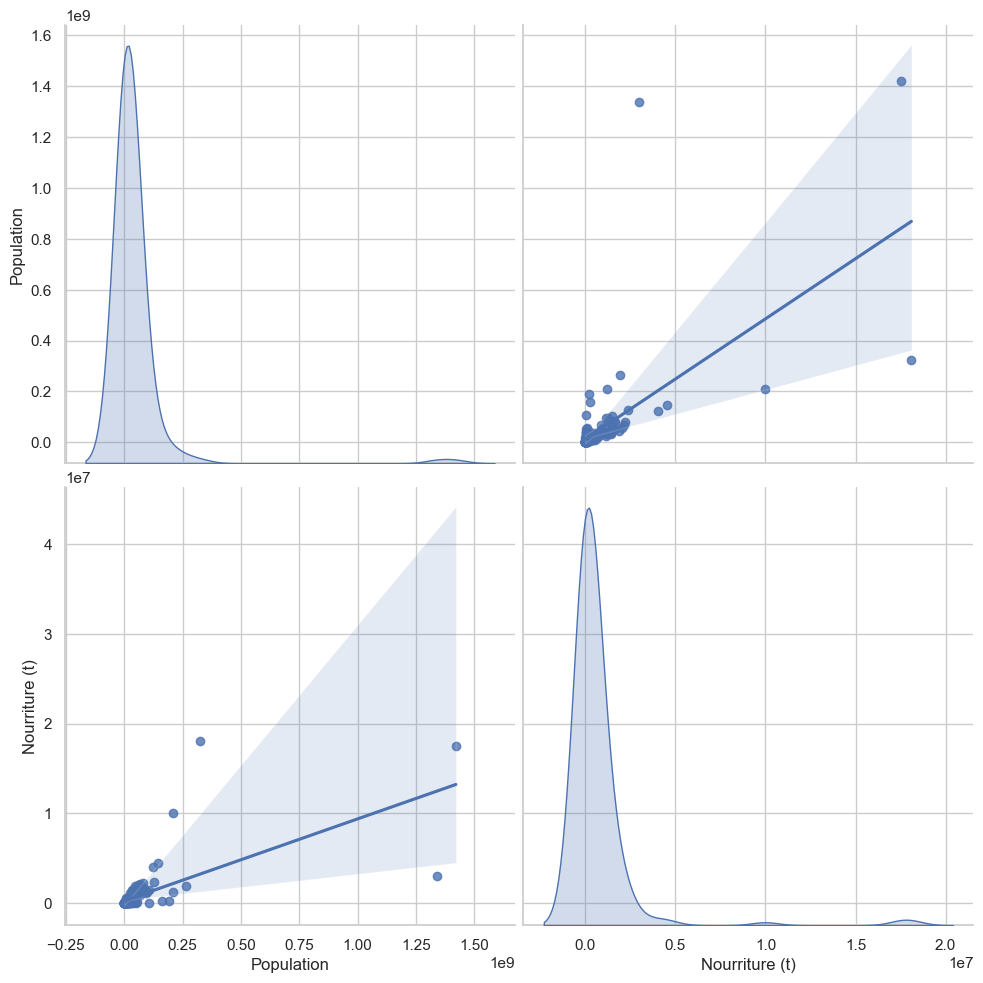

In [70]:
# Sélectionner les colonnes d'intérêt
colonnes = ['Population', 'Nourriture (t)']

# Créer le pair plot avec régression linéaire et densité sur la diagonale
sns.pairplot(
    df_numerique[colonnes],
    kind='reg',  # Courbes de régression linéaire
    diag_kind='kde',  # Courbes de densité sur la diagonale
    height=5
)
plt.show()

On observe une tendance linéaire ascendante très nette. Certains pays ont une consommation de nourriture proportionnellement plus élevée que leur population (points situés au-dessus de la droite), suggérant une préférence marquée pour la volaille dans leur régime alimentaire national.

<b><u>PIB et Infrastructures</u></b>

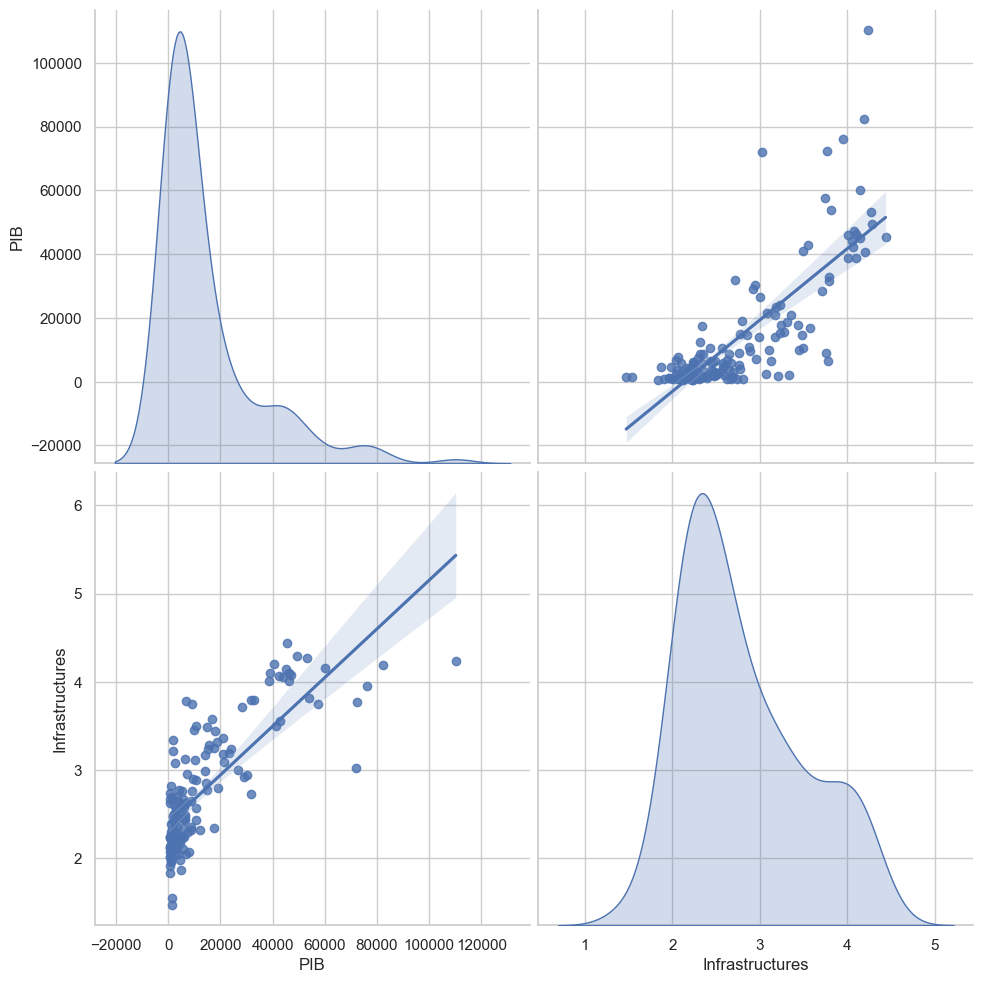

In [71]:
# Sélectionner les colonnes d'intérêt
colonnes = ['PIB', 'Infrastructures']

# Créer le pair plot avec régression linéaire et densité sur la diagonale
sns.pairplot(
    df_numerique[colonnes],
    kind='reg',  # Courbes de régression linéaire
    diag_kind='kde',  # Courbes de densité sur la diagonale
    height=5
)
plt.show()

corrélation positive très forte. Plus un pays est riche (PIB élevé), plus ses infrastructures sont développées. un "peloton" dense de pays en bas à gauche qui ont à la fois un faible PIB et des infrastructures limitées. La richesse national est un bon indicateur de la qualité des infrastructures.

<b><u>Stabilité Politique et PIB</u></b>

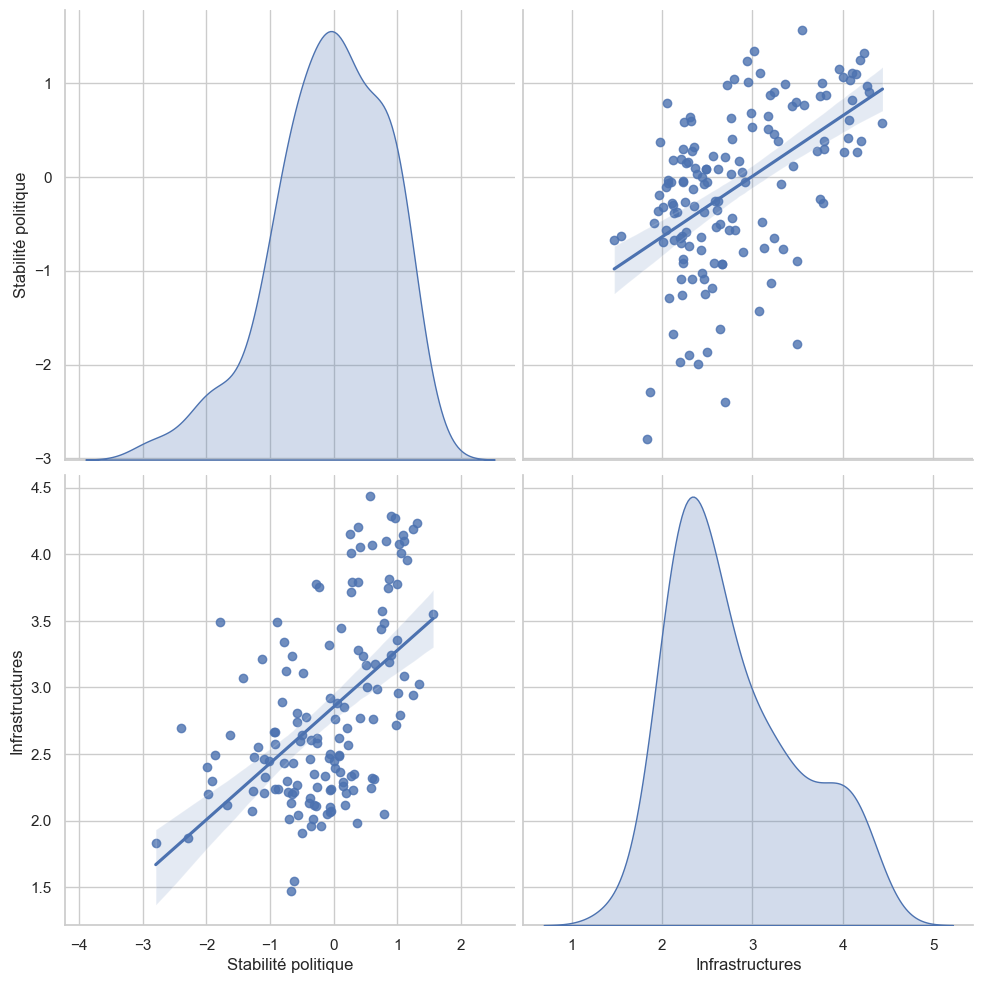

In [72]:
# Sélectionner les colonnes d'intérêt
colonnes = ['Stabilité politique', 'Infrastructures']

# Créer le pair plot avec régression linéaire et densité sur la diagonale
sns.pairplot(
    df_numerique[colonnes],
    kind='reg',  # Courbes de régression linéaire
    diag_kind='kde',  # Courbes de densité sur la diagonale
    height=5
)
plt.show()

1. Stabilité politique : La distribution est centrée autour de 0, s'étendant d'environ -3 à +1,5. Courbe équilibrée, diversité de situations politiques
2. Infrastructures : On observe deux pics légers (distribution bimodale), l'un autour de 2,5 et l'autre vers 4. Cela suggère une séparation entre les pays encore sous-équipés et ceux ayant déjà atteint un certain seuil de développement infrastructurel.
Nuages de points : corrélation positive modérée à forte. P
lus un pays gagne en stabilité politique, plus ses scores d'infrastructures augmentent.

<b><u>Douanes et PIB</u></b>

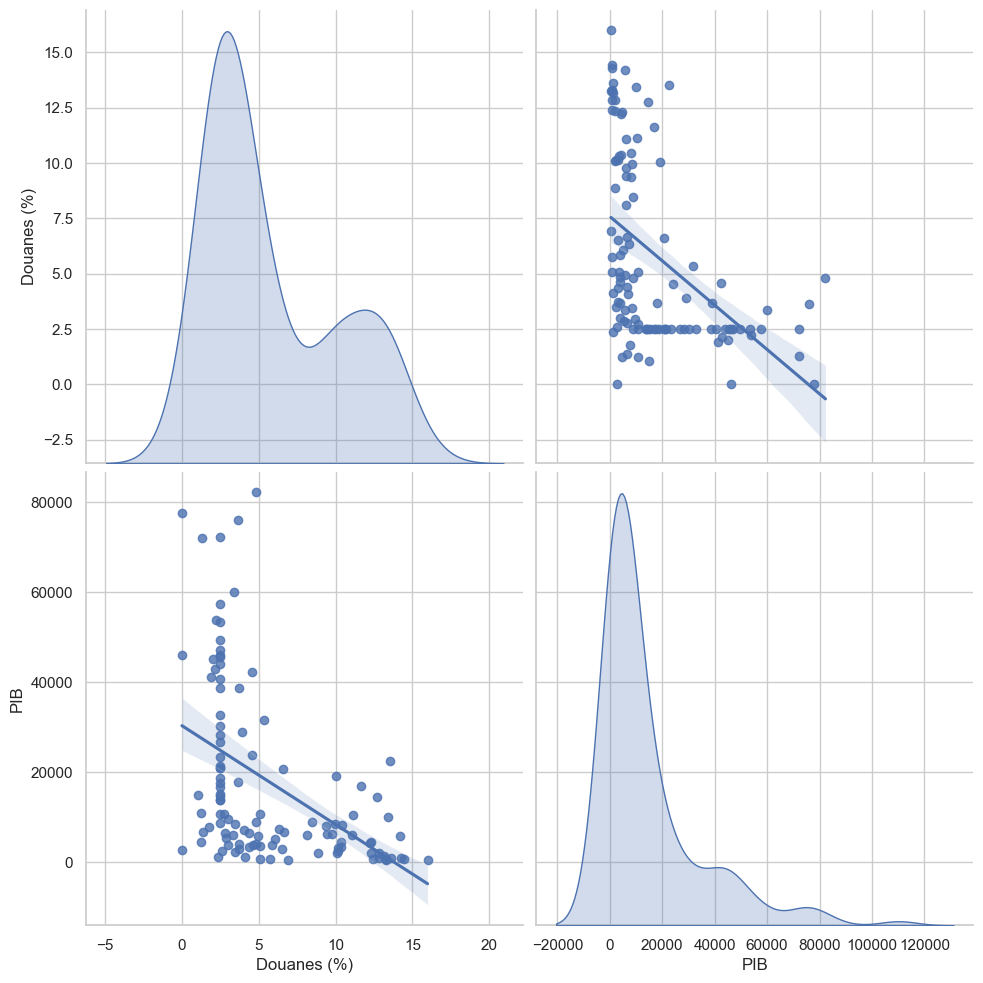

In [73]:
# Sélectionner les colonnes d'intérêt
colonnes = ['Douanes (%)', 'PIB']

# Créer le pair plot avec régression linéaire et densité sur la diagonale
sns.pairplot(
    df_numerique[colonnes],
    kind='reg',  # Courbes de régression linéaire
    diag_kind='kde',  # Courbes de densité sur la diagonale
    height=5
)
plt.show()

La droite de régression chute de façon nette. Cela signifie que plus le PIB d'un pays est élevé, plus ses tarifs douaniers ont tendance à être bas
Le "L" du Développement : Les points forment une structure en angle droit.
Les pays à haut PIB (au-delà de 40 000) ont quasi systématiquement des douanes très faibles (inférieures à 5%).

Les pays à bas PIB présentent une volatilité immense, avec des tarifs allant de 0% à plus de 15%.
Ce graphique démontre qu'il existe une barrière tarifaire inversement proportionnelle à la richesse.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Analyse bivariée</h3>

<b><u>quanti/quali</u></b>

<b>1. Exportations par pays</b>

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_18712\3648320536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


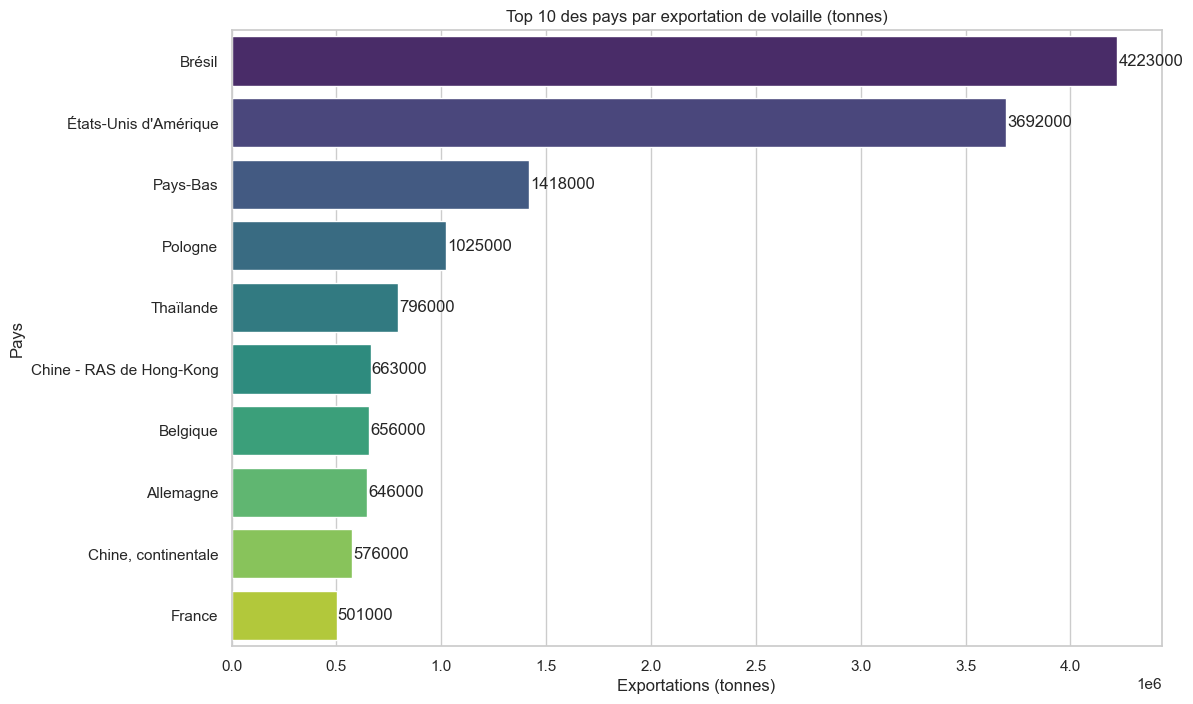

In [74]:
# Trier les pays par Exportation (décroissant) et sélection des 10 premiers
top_production = df_pestel.sort_values('Exportations (t)', ascending=False).head(10)

# Créer le graphique
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Exportations (t)',
    y='Zone',
    data=top_production,
    palette='viridis'
)

# Ajouter les valeurs sur chaque barre
for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 5000,  # Décalage horizontal pour éviter le chevauchement
        p.get_y() + p.get_height() / 2,  # Centrer verticalement
        f"{int(width)}",  # Valeur à afficher (arrondie à l'entier)
        ha='left',  # Alignement horizontal
        va='center'  # Alignement vertical
    )

# Titres et labels
plt.title("Top 10 des pays par exportation de volaille (tonnes)")
plt.xlabel("Exportations (tonnes)")
plt.ylabel("Pays")

# Afficher le graphique
plt.show()

<b>2. Importations par pays</b>

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_18712\795691505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


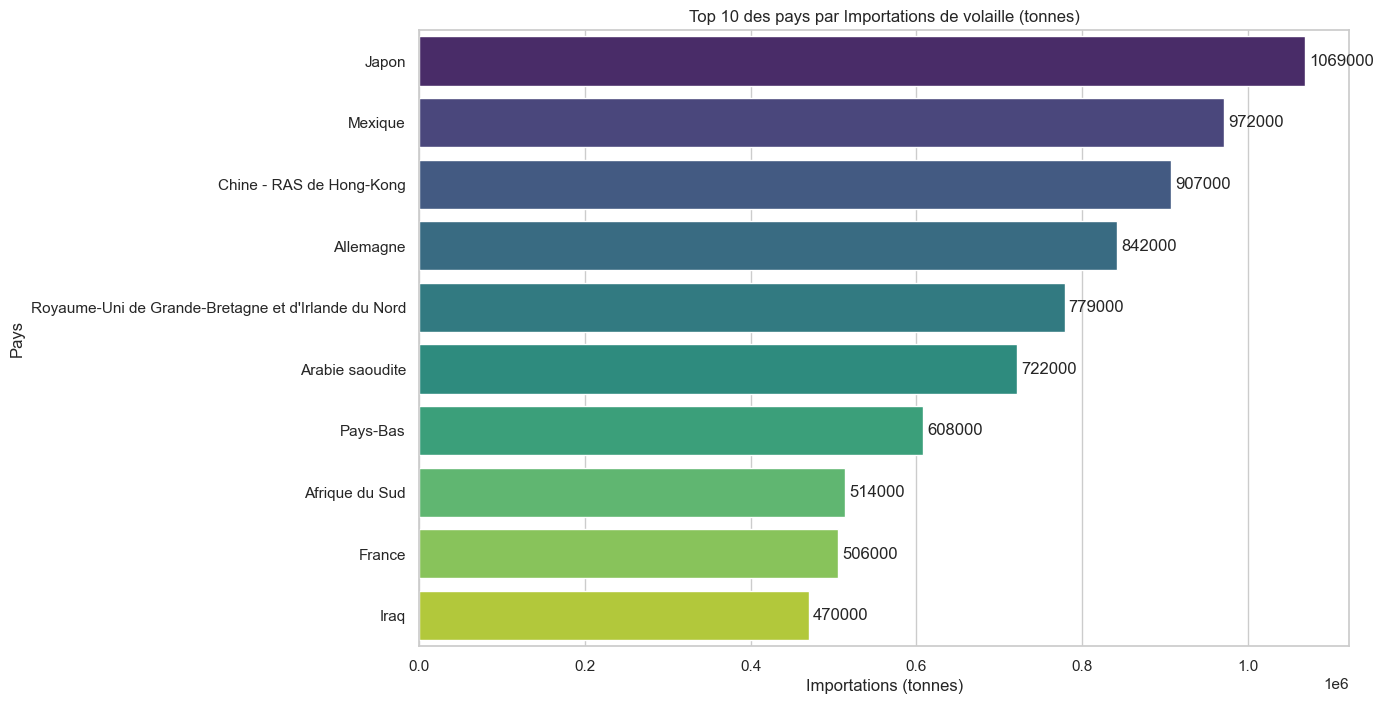

In [75]:
# Trier les pays par Importations (décroissant) et sélection des 10 premiers
top_production = df_pestel.sort_values('Importations (t)', ascending=False).head(10)

# Créer le graphique
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Importations (t)',
    y='Zone',
    data=top_production,
    palette='viridis'
)

# Ajouter les valeurs sur chaque barre
for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 5000,  # Décalage horizontal pour éviter le chevauchement
        p.get_y() + p.get_height() / 2,  # Centrer verticalement
        f"{int(width)}",  # Valeur à afficher (arrondie à l'entier)
        ha='left',  # Alignement horizontal
        va='center'  # Alignement vertical
    )

# Titres et labels
plt.title("Top 10 des pays par Importations de volaille (tonnes)")
plt.xlabel("Importations (tonnes)")
plt.ylabel("Pays")

# Afficher le graphique
plt.show()

<b>3. Production</b>

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_18712\276056468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


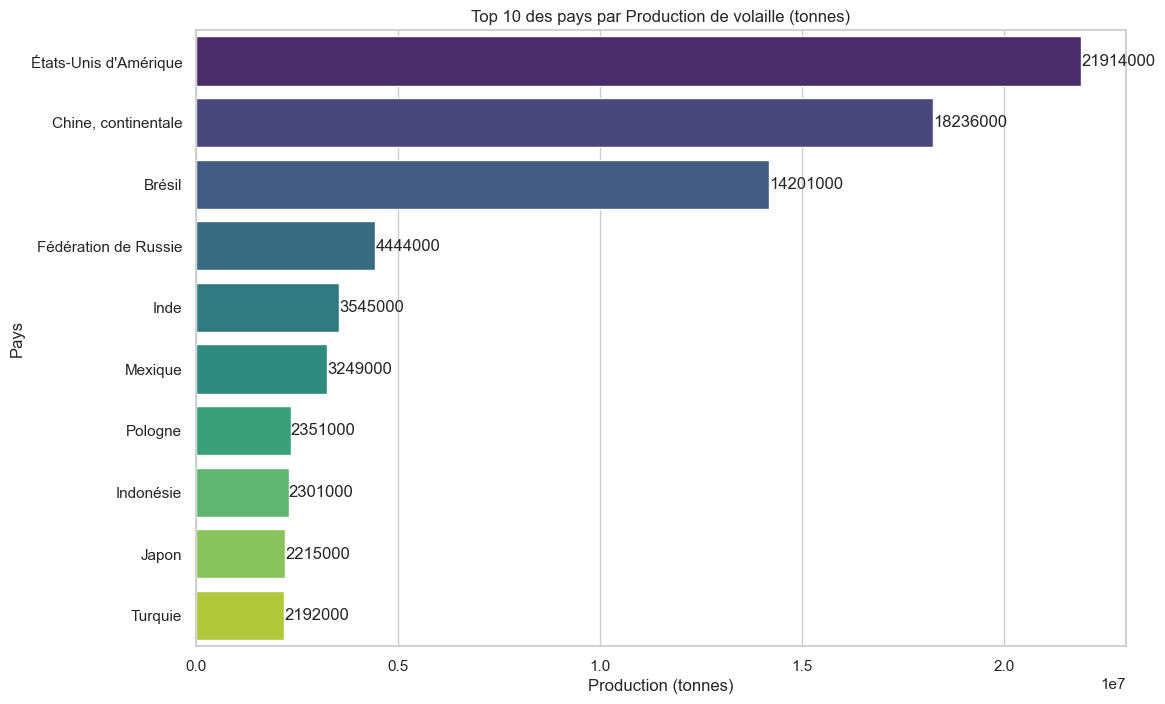

In [76]:
# Trier les pays par Production (décroissant) et sélection des 10 premiers
top_production = df_pestel.sort_values('Production (t)', ascending=False).head(10)

# Créer le graphique
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Production (t)',
    y='Zone',
    data=top_production,
    palette='viridis'
)

# Ajouter les valeurs sur chaque barre
for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 5000,  # Décalage horizontal pour éviter le chevauchement
        p.get_y() + p.get_height() / 2,  # Centrer verticalement
        f"{int(width)}",  # Valeur à afficher (arrondie à l'entier)
        ha='left',  # Alignement horizontal
        va='center'  # Alignement vertical
    )

# Titres et labels
plt.title("Top 10 des pays par Production de volaille (tonnes)")
plt.xlabel("Production (tonnes)")
plt.ylabel("Pays")

# Afficher le graphique
plt.show()